# **DATA VISULISATION, PREPROCESSING AND SELECTION**

In [47]:
#import necessary librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import statistics 
import math
import matplotlib.image as mpimg

In [48]:
#install geopanda in order to plot further down our points on a map
! pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [49]:
#open our dataframe
data=pd.read_csv(r"/Users/hamzaab/Desktop/cours/2Ak/statap/eswd_reports_europe_1970_2022.csv", low_memory=False)

#number of nan values per column
x=data.count()
print(x.to_string())

ID                           48389
QC_LEVEL                     48389
INFO_SOURCE                  48387
CONTACT                      48380
EMAIL                            0
ORGANISATION                  8672
ORGANISATION_ID                573
NO_REVISION                  48389
PERSON_REVISION              46471
TIME_EVENT                   48389
TIME_CREATION                48389
TIME_LAST_REVISION           48389
TIME_ACCURACY                46696
COUNTRY                      48389
STATE                        43987
PLACE                        48389
PLACE_LOCAL_LANGUAGE           420
DETAILED_LOCATION             1310
NEAREST_CITY                   530
LATITUDE                     48389
LONGITUDE                    48389
PLACE_ACCURACY               22692
OROGRAPHY                    12406
SURFACE_INITIAL_LOCATION     24440
SURFACE_CROSSED              29007
TYPE_EVENT                   48389
NO_OBJECTS                       0
MAX_HAIL_DIAMETER            31697
MAX_HAILSTONE_WEIGHT

In [50]:
#delete the non necessary columns
df=data.drop(['CONTACT','EMAIL', 'ORGANISATION', 'ORGANISATION_ID','CREATOR_ID','REVISOR_ID','PERSON_REVISION','PLACE_LOCAL_LANGUAGE','OROGRAPHY','SURFACE_INITIAL_LOCATION','SURFACE_CROSSED','NO_OBJECTS','EXT_URL','LINK_ORG','LINK_ID','DELETED','F_SCALE','T_SCALE','RATING_BASIS','WIND_SPEED','TEN_MIN_WIND_SPEED','FUNNEL_SIGHTED'  ,'SUCTION_VORTICES' ,'PRECIPITATION_AMOUNT','SNOW_FALL_AMOUNT','PEAK_PRECIP_AMOUNT','PEAK_SNOW_FALL_AMOUNT','PEAK_PRECIP_PERIOD','MAX_6_HOUR_PRECIP','MAX_6_HOUR_SNOW_FALL','MAX_12_HOUR_PRECIP','MAX_12_HOUR_SNOW_FALL','MAX_24_HOUR_PRECIP' ,'MAX_24_HOUR_SNOW_FALL','TYPE_PRECIP','SIZE_ACCOMPANYING_HAIL','POSSIBILITIES','PATH_LENGTH','MEAN_PATH_WIDTH','MAX_PATH_WIDTH','MAX_VERTICAL_DEVELOP','DIRECTION_MOVEMENT','SNOW_HAZARDS','MEAN_HEIGHT_SNOW_CORNICES','MAX_HEIGHT_SNOW_CORNICES','ICE_HAZARDS','THICKNESS_ICE_COVER','THICKNESS_RIME_COVER','AVALANCHE_TYPE','AVALANCHE_FLOW_TYPE','SNOW_MASS_TYPE','AVALANCHE_SIZE','AVALANCHE_TRIGGER','ELEVATION_START','ELEVATION_DIFFERENCE','LIGHTNING_DAMAGE_TO','PEAK_CURRENT','POLARITY','TIME_CREATION','TIME_LAST_REVISION','DETAILED_LOCATION','MAX_HAILSTONE_WEIGHT','CONVECTIVE','PATH_START_LATITUDE','PATH_START_LONGITUDE','PATH_START_DATETIME','PATH_END_LATITUDE','PATH_END_LONGITUDE','PATH_END_DATETIME'],axis=1)

print(df.count())

ID                       48389
QC_LEVEL                 48389
INFO_SOURCE              48387
NO_REVISION              48389
TIME_EVENT               48389
TIME_ACCURACY            46696
COUNTRY                  48389
STATE                    43987
PLACE                    48389
NEAREST_CITY               530
LATITUDE                 48389
LONGITUDE                48389
PLACE_ACCURACY           22692
TYPE_EVENT               48389
MAX_HAIL_DIAMETER        31697
AVERAGE_HAIL_DIAMETER     2310
THICKNESS_HAIL_LAYER      1941
HAILSTONE                48317
TOTAL_DURATION            2192
EXCEPT_ELEC_PHENOM       37290
PROPERTY_DAMAGE           2673
CROP_FOREST_DAMAGE        6466
TOTAL_DAMAGE               299
NO_INJURED                 508
NO_KILLED                  732
EVENT_DESCRIPTION        35956
REFERENCE                17599
IMPACTS                   5553
dtype: int64


# **DATA VISULISATION, PREPROCESSING AND SELECTION**

           ID
COUNTRY      
VA          1
EG          1
JO          2
TM          2
UZ          3
LY          4
IS          4
LB          5
IE          5
SY          5
TJ          5
MA          6
IL          7
LI          7
KG          9
MT         11
AD         11
TN         19
NO         21
AL         31
MK         36
DZ         40
ME         41
LU         44
DK         80
XK         87
SE         89
LT         90
LV         92
EE        103
CY        120
PT        138
KZ        139
BE        160
NL        185
UK        219
BA        228
SK        327
BY        364
FI        396
MD        472
GE        488
SI        538
AZ        551
HR        552
RS        671
AR        718
CZ        926
BG        986
CH       1030
UA       1099
RO       1187
GR       1201
HU       1255
ES       1737
AT       1941
TR       3410
FR       4008
PL       4975
IT       5203
RU       5653
DE       6651


Text(0, 0.5, 'Nombre de rapports')

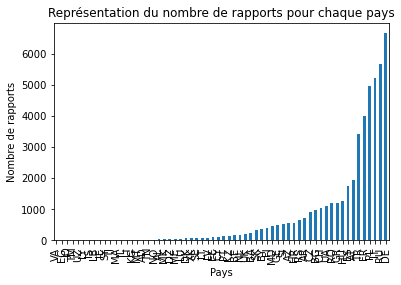

In [6]:
#distribution of reports per country
reports_country=df.groupby(['COUNTRY'])[['ID']].count() 
reports_country = reports_country.sort_values('ID')
print(reports_country.to_string())
reports_country['ID'].plot(kind='bar')
plt.title('Représentation du nombre de rapports pour chaque pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de rapports')

In [7]:
#distribution of reports within each country
reports_state=df.groupby(['STATE'])[['ID']].count() #comptage des valeurs non nulles par état
reports_state = reports_state.sort_values('ID')
print(reports_state.to_string())

                                                      ID
STATE                                                   
                                                       1
Neftçala                                               1
Galaţi                                                 1
Sanliurfa Province                                     1
Nederland                                              1
Neamt                                                  1
Saratovskaya oblast                                    1
Fthiotis                                               1
Savinja                                                1
Frýdek-Místek                                          1
Naâma                                                  1
Saône-et-Loire                                         1
Schaan                                                 1
Mécheria                                               1
Frederikssund Kommune                                  1
Karlovarský  kraj              

In [8]:
#distribution of reports per country per state
nb_country_state=df.groupby(['COUNTRY','STATE'])[['ID']].count() 
print(nb_country_state.to_string())

                                                              ID
COUNTRY STATE                                                   
AD      Encamp                                                 3
        Escaldes-Engolasters                                   1
        La Massana                                             1
        Ordino                                                 3
        Sant Julià de Lòria                                    2
AL      Dibër                                                  1
        Durrës                                                 1
        Elbasan                                                5
        Fier                                                   2
        Korçë                                                 14
        Kukës                                                  1
        Lezhë                                                  1
        Shkodër                                                3
        Tirana           

        ID
YEAR      
1970     6
1971     8
1972     5
1973    12
1974    33
1975    22
1976    11
1977    37
1978    10
1979   103
1980   138
1981   143
1982   188
1983   179
1984   224
1985   124
1986    67
1987    19
1988    35
1989    17
1990    11
1991    10
1992    43
1993    53
1994    48
1995    33
1996    65
1997    91
1998   124
1999    78
2000   149
2001   198
2002   385
2003   327
2004   472
2005   552
2006   757
2007  1350
2008  1429
2009  1406
2010  1633
2011  1813
2012  2343
2013  2238
2014  2210
2015  2030
2016  2819
2017  2600
2018  2365
2019  3322
2020  3281
2021  5384
2022  7389


<function matplotlib.pyplot.show(*args, **kw)>

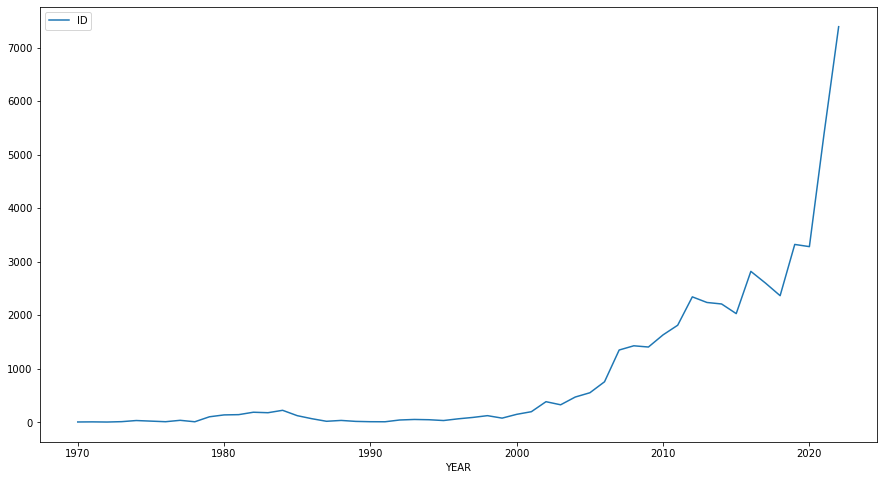

In [52]:
# function allowing us to extract the year from the date of the event
def get_year(donnee):
    date=donnee['TIME_EVENT']
    dt=datetime.strptime(date,'%Y-%m-%d %H:%M:%S')
    dt=dt.year
    return dt

# creation of a column containing the year of the event
df['YEAR']=df.apply(lambda donnee: get_year(donnee), axis=1)

#number of reports per year
reports_per_year=df.groupby(['YEAR'])[['ID']].count()
print(reports_per_year.to_string())
reports_per_year.plot(figsize=(15,8))
plt.show

In [53]:
# deleting data prior to 2007 
df.drop(df[df.YEAR < 2007].index, inplace=True)

          ID
MONTH       
1        260
2        158
3        421
4       1832
5       9541
6      15073
7       8889
8       5236
9       1372
10       523
11       202
12       105


<function matplotlib.pyplot.show(*args, **kw)>

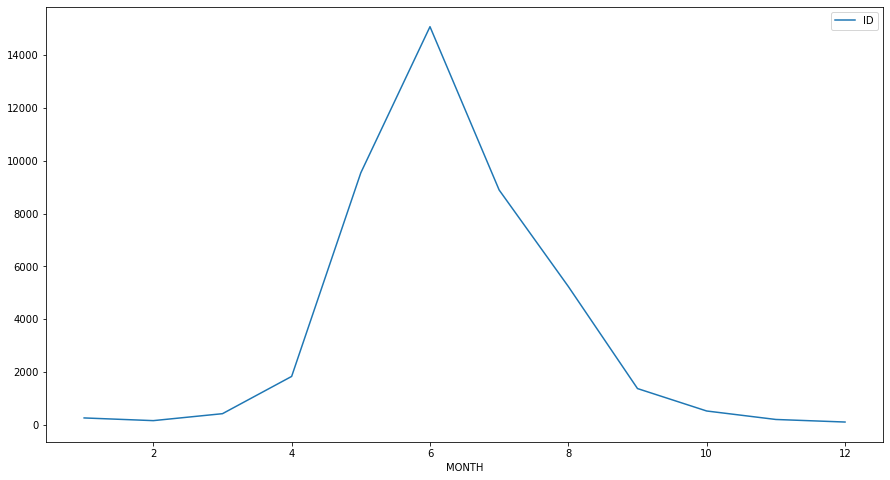

In [11]:
# function allowing us to extract the month from the date of the event
def get_month(donnee):
    date=donnee['TIME_EVENT']
    dt=datetime.strptime(date,'%Y-%m-%d %H:%M:%S')
    dt=dt.month
    return dt



# creation of a column containing the month of the event
df['MONTH']=df.apply(lambda donnee: get_month(donnee), axis=1)

#number of reports per month
reports_per_month=df.groupby(['MONTH'])[['ID']].count()
print(reports_per_month.to_string())
reports_per_month.plot(figsize=(15,8))
plt.show

                  ID
TIME_ACCURACY       
HALF_MONTH         3
GT1D              60
1D                93
1M               107
12H              400
6H               971
3H              2783
1H              5503
30M             5902
15M            12866
5M             13554


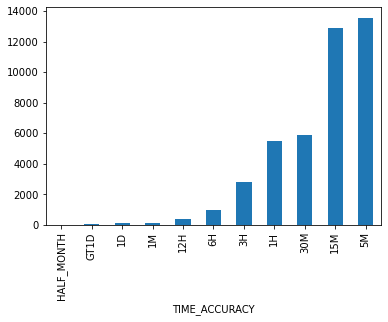

In [12]:
# distribution of the reports following time accuracy
time_acc_dist=df.groupby(['TIME_ACCURACY'])[['ID']].count()
time_acc_dist=time_acc_dist.sort_values('ID')
print(time_acc_dist.to_string())
time_acc_dist['ID'].plot(kind='bar')

                   ID
PLACE_ACCURACY       
100KM              27
10KM              775
1KM              5837
20KM              500
3KM             12667
50KM               10
5KM              2245
GT100KM             1


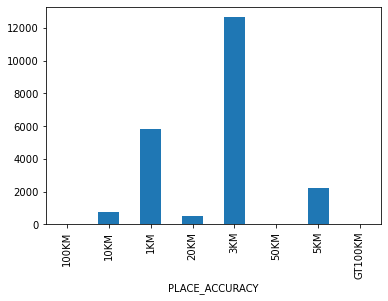

In [13]:
# distribution of the reports following place accuracy
place_acc_dist=df.groupby(['PLACE_ACCURACY'])[['ID']].count()
place_acc_dist=place_acc_dist.sort_values('PLACE_ACCURACY')
print(place_acc_dist.to_string())
place_acc_dist['ID'].plot(kind='bar')

La moyenne est  nan et l'écart type est nan
                     ID
MAX_HAIL_DIAMETER      
0.00                  6
0.50                  4
0.80                  1
1.00                 94
1.20                  1
1.40                  1
1.50                 59
1.70                  1
1.80                  1
2.00               9693
2.10                  2
2.20                 18
2.25                124
2.30                 17
2.40                 11
2.50               1959
2.60                  6
2.70                  4
2.75                 91
2.80                  5
2.90                  1
3.00               6611
3.20                  3
3.25                106
3.30                  3
3.40                  7
3.50               1285
3.60                  1
3.70                  5
3.75                 20
3.80                  5
3.85                  1
4.00               4114
4.10                  1
4.20                  7
4.25                 36
4.30                  4
4.35                

<function matplotlib.pyplot.show(*args, **kw)>

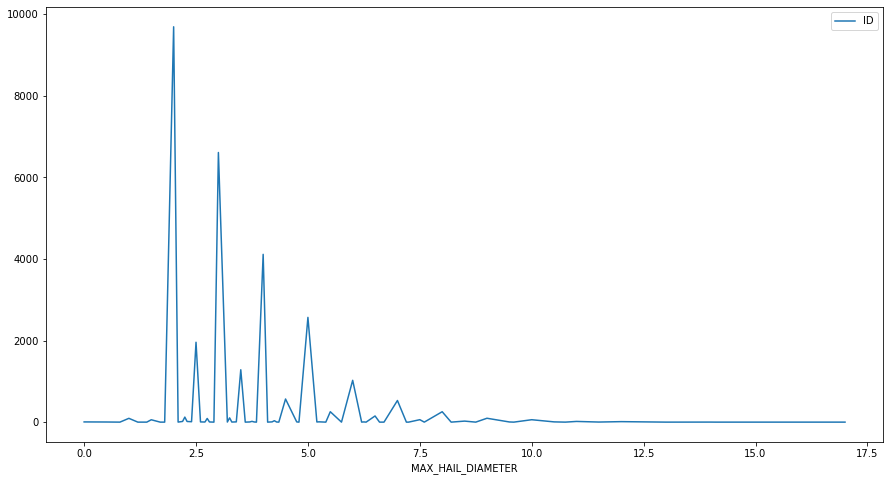

In [14]:
#computing the mean and standard deviation of the maximum hail diameter of each event
mean=statistics.mean(df['MAX_HAIL_DIAMETER'])
std=statistics.stdev(df['MAX_HAIL_DIAMETER'])
print("La moyenne est ", mean, "et l'écart type est" ,std)

# distribution of max hail diameter
hail_diam_freq=df.groupby(['MAX_HAIL_DIAMETER'])[['ID']].count()
print(hail_diam_freq.to_string())
hail_diam_freq.plot(figsize=(15,8))
plt.show

# **Next, we want to adress the problem of missing values with seeing its distribution in the dataframe**

In [15]:
#function allowing to tell if its a nanvalue or not
def isNaN(string):
    return string != string

#distribution of nan values in max hail diameter and place accuracy for each country 

#list containing countries
country=df['COUNTRY'].unique()

#list containing the number of nan values in MAX_HAIL_DIAMETER for each country
null_diam=[]
#list contaning the number of nanvalues in place accuracy for each country
null_placeacc=[]

for i in range(len(country)):
    s=0
    t=0
    for j in range(len(df)):
        if df['COUNTRY'][j]==country[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam.append(s)
    null_placeacc.append(t)

#data frame containg stocking the 3 lists
nan_values_country = pd.DataFrame({'Country': country,
              'Number of NaN Values Hail': null_diam, 'Number of NaN Values Place': null_placeacc})

nan_values_country=nan_values_country.sort_values('Number of NaN Values Hail')
print(nan_values_country.to_string()) 

   Country  Number of NaN Values Hail  Number of NaN Values Place
60      EG                          0                           1
3       LB                          0                           0
54      MT                          0                           7
41      LI                          0                           0
59      IE                          1                           1
56      IS                          1                           3
55      JO                          1                           1
52      UZ                          1                           0
48      LY                          1                           0
47      KG                          1                           0
5       MA                          2                           2
53      TM                          2                           0
50      IL                          2                           2
29      EE                          4                          18
37      AD

In [16]:
#distribution of nan values in max hail diameter and place accuracy according to QC-Levels

#list containg QC-LEVELS
qc=df['QC_LEVEL'].unique()
#list containing the number of nan values in MAX_HAIL_DIAMETER for each QC-LEVEL
null_diam1=[]
#list contaning the number of nanvalues in place accuracy for each QC-LEVEL
null_placeacc1=[]

for i in range(len(qc)):
    s=0
    t=0
    for j in range(len(df)):
        if df['QC_LEVEL'][j]==qc[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam1.append(s)
    null_placeacc1.append(t)

nan_values_QC = pd.DataFrame({'QC-LEVEL': qc,
              'Number of NaN Values Hail': null_diam1,'Number of NaN Values Place':null_placeacc1})
nan_values_QC=nan_values_QC.sort_values('Number of NaN Values Hail')
print(nan_values_QC.to_string())     

  QC-LEVEL  Number of NaN Values Hail  Number of NaN Values Place
2      QC2                        435                         850
1     QC0+                       2103                        3878
0      QC1                      11072                       16822


In [17]:
#distribution of nan values in max hail diameter and place accuracy for each year

#list containing years
year=df['YEAR'].unique()
#list containing the number of nan values in MAX_HAIL_DIAMETER for each year
null_diam2=[]
#list contaning the number of nanvalues in place accuracy for each year
null_placeacc2=[]

for i in range(len(year)):
    s=0
    t=0
    for j in range(len(df)):
        if df['YEAR'][j]==year[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam2.append(s)
    null_placeacc2.append(t)

nan_values_year = pd.DataFrame({'YEAR': year,
              'Number of NaN Values Hail': null_diam2,'Number of NaN Values Place':null_placeacc2})
nan_values_year=nan_values_year.sort_values('Number of NaN Values Hail')
print(nan_values_year.to_string()) 

    YEAR  Number of NaN Values Hail  Number of NaN Values Place
4   2018                        659                         627
3   2019                        676                         196
13  2009                        689                        1354
2   2020                        760                         450
7   2015                        769                        1771
11  2011                        773                        1560
5   2017                        809                        2291
14  2008                        849                        1400
1   2021                        859                         619
15  2007                        886                        1239
12  2010                        913                        1283
0   2022                        915                         719
6   2016                        964                        2573
9   2013                       1010                        1678
8   2014                       1011     

In [18]:
#distribution of nan values in max hail diameter and place accuracy according to time accuracy

#list containing every time accuracy
timeacc=df['TIME_ACCURACY'].unique()
#list containing the number of nan values in MAX_HAIL_DIAMETER for each time accuracy
null_diam3=[]
#list contaning the number of nanvalues in place accuracy for each time accuracy
null_placeacc3=[]

for i in range(len(timeacc)):
    s=0
    t=0
    for j in range(len(df)):
        if df['TIME_ACCURACY'][j]==timeacc[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam3.append(s)
    null_placeacc3.append(t)

nan_values_timeacc = pd.DataFrame({'TIME_ACCURACY': timeacc,'Number of NaN Values Hail': null_diam3,'Number of NaN Values Place':null_placeacc3})
nan_values_timeacc=nan_values_timeacc.sort_values('Number of NaN Values Hail')
print(nan_values_timeacc.to_string())     

   TIME_ACCURACY  Number of NaN Values Hail  Number of NaN Values Place
8            NaN                          0                           0
9     HALF_MONTH                          2                           2
5             1M                         24                          11
11          GT1D                         54                          55
7             1D                         85                          83
10           12H                        334                         355
6             6H                        664                         880
0             5M                       1553                        4237
4             3H                       1775                        2162
3            30M                       2288                        3035
2             1H                       3210                        4464
1            15M                       3298                        4981


In [19]:
#distribution of nan values in max hail diameter and place accuracy for each month

#list containing months
month=df['MONTH'].unique()
#list containing the number of nan values in MAX_HAIL_DIAMETER for each month
null_diam4=[]
#list contaning the number of nanvalues in place accuracy for each month
null_placeacc4=[]

for i in range(len(month)):
    s=0
    t=0
    for j in range(len(df)):
        if df['MONTH'][j]==month[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam4.append(s)
    null_placeacc4.append(t)

nan_values_month = pd.DataFrame({'MONTH': month,'Number of NaN Values Hail': null_diam4,'Number of NaN Values Place':null_placeacc4})
nan_values_month=nan_values_month.sort_values('Number of NaN Values Hail')
print(nan_values_month.to_string())   

    MONTH  Number of NaN Values Hail  Number of NaN Values Place
10     12                         61                          61
8       2                         86                          78
11     11                         91                         123
9       1                        146                         151
0      10                        176                         214
7       3                        249                         265
1       9                        407                         724
6       4                        927                        1022
2       8                       1336                        2895
3       7                       2257                        4523
5       5                       3587                        5409
4       6                       4287                        6085


# **DATA VISUALIZATION**

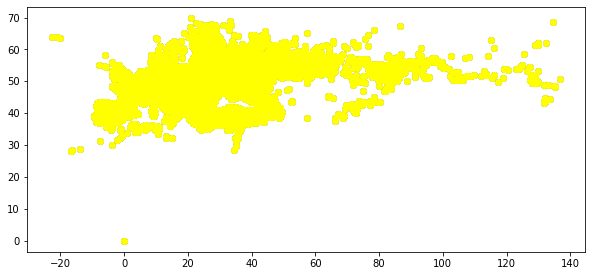

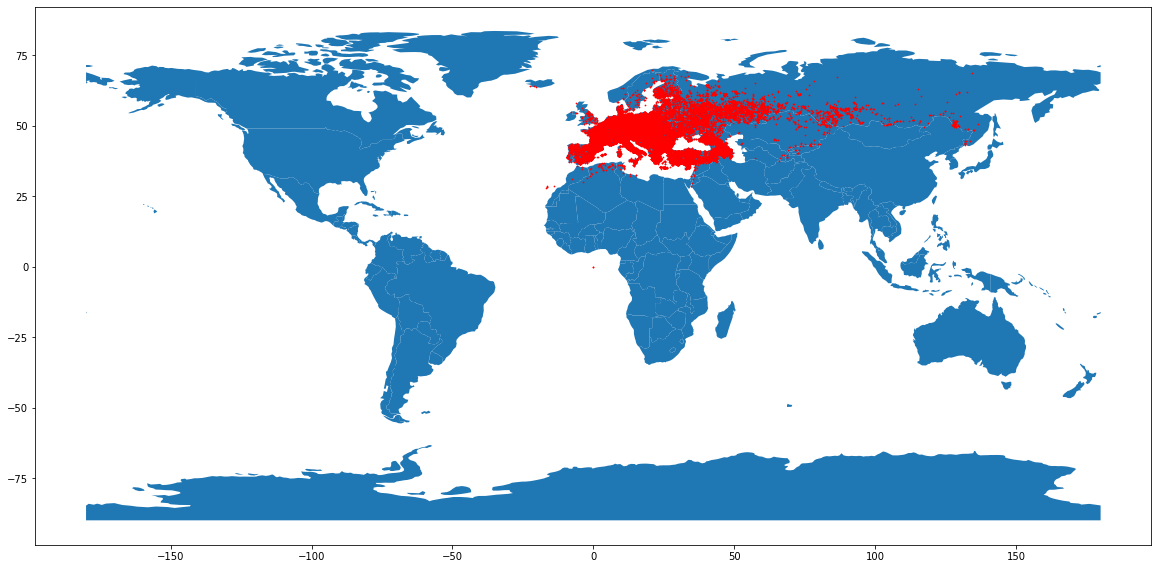

In [20]:
# representation of the reports on a map
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = GeoDataFrame(df, geometry=geometry)   


ax = gdf.plot(figsize=(10,5), color="gray")
gdf.plot(figsize=(10,5), ax=ax, color="yellow")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 15)), marker='o', color='red', markersize=0.5)

In [54]:
# we wish to convert TIME EVENT into a datetime format in order to be easier to manipulate
def convert_to_dt(donnee):
    date=donnee['TIME_EVENT']
    dt=datetime.strptime(date,'%Y-%m-%d %H:%M:%S')
    return dt
df['TIME']=df.apply(lambda donnee: convert_to_dt(donnee), axis=1)

In [55]:
# replace string values in time accuracy and place accuracy into integers (respectively into minutes and meters)
df=df.replace('1M','1')
df=df.replace('5M','5')
df=df.replace('15M','15')
df=df.replace('30M','30')
df=df.replace('1H','60')
df=df.replace('3H','180')
df=df.replace('6H','360')
df=df.replace('12H','720')
df=df.replace('GT1D','1440')
df=df.replace('1D','1440')
df=df.replace('HALF_MONTH','21600')
df=df.replace('1KM','1000')
df=df.replace('3KM','3000')
df=df.replace('5KM','5000')
df=df.replace('10KM','10000')
df=df.replace('20KM','20000')
df=df.replace('50KM','50000')
df=df.replace('100KM','100000')
df=df.replace('GT100KM','100000')
df['TIME_ACCURACY'] = df['TIME_ACCURACY'].fillna(0).astype(int)
df['PLACE_ACCURACY'] = df['PLACE_ACCURACY'].fillna(0).astype(int)

In [56]:
#maintaining only the columns needed for our model
df=df.loc[:,['LATITUDE','LONGITUDE','TIME_EVENT','COUNTRY','YEAR']]

In [57]:
# delete data prior to 2013 
#(radar data provided to us only start from 2013, we wont be able to confront data prior to that year)
df.drop(df[df.YEAR < 2013].index, inplace=True)

In [28]:
#export dataframe in order to use it 
df.to_csv(r"/Users/hamzaab/Desktop/cours/2Ak/statap/bdd.csv")

# **Next, we want to add demographic indicators to our dataframe**

In [84]:
# we load two dataframes, one from insee and the other from laposte
data_insee=pd.read_csv(r"/Users/hamzaab/Desktop/cours/2Ak/statap/data.csv", encoding= 'unicode_escape')
data_poste=pd.read_csv(r"/Users/hamzaab/Desktop/cours/2Ak/statap/laposte_hexasmal2.csv", low_memory=False)

In [85]:
#we merge the two on code_insee of the towns 
#insee contains demographic indicators from each city and la poste contain GPS coordinates of these cities
demog=pd.merge(data_insee, data_poste, on="Code_insee", how="left")

In [86]:
# leave columns needed only
demog=demog.loc[:,['Code_insee','Libelle','Population municipale 2020','Latitude','Longitude']]

# delete duplicated lines
demog = demog.drop_duplicates(subset=['Population municipale 2020'], keep='first')

#drop nan values
demog = demog[demog['Population municipale 2020'] != 'N/A - r\x8esultat non disponible']

In [87]:
#convert object type number of population into integers
demog['Population municipale 2020'] = demog['Population municipale 2020'].astype(int)

<function matplotlib.pyplot.show(*args, **kw)>

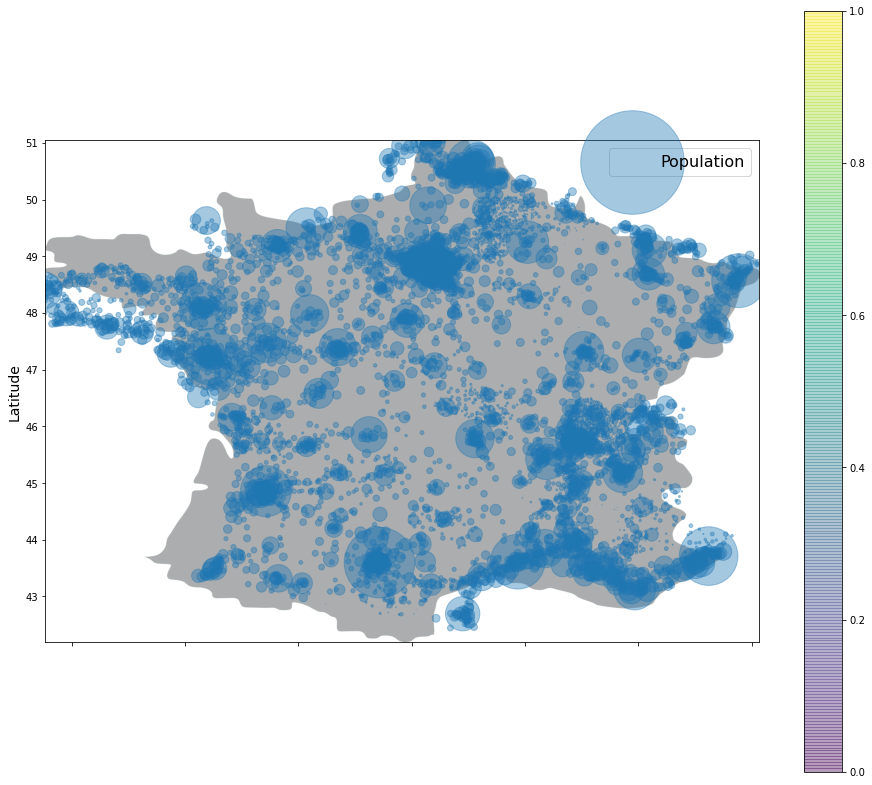

In [33]:
#representation of our data on a map
france_img=mpimg.imread(r'/Users/hamzaab/Desktop/cours/2Ak/statap/france2.png')
ax = demog.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(16,14),s=demog['Population municipale 2020']/100, label="Population", cmap=plt.get_cmap("jet"),colorbar=True, alpha=0.4)
plt.imshow(france_img, extent=[-4.47, 8.13, 42.19, 51.05], alpha=0.4)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show

In [88]:
#export dataframe to use it later 
demog.to_csv(r"/Users/hamzaab/Desktop/cours/2Ak/statap/demog.csv")

# **Next, we weach to merge the ESWD reports for France with the demographic data we have, to each report we will assign the closest city and for that we'll compute haversine distance using GPS coordinates**

In [89]:
#maintain data from France only
x='FR'
df_FR=df[df['COUNTRY']==x]

In [90]:
from math import radians, cos, sin, asin, sqrt

#function allowing to compute haversine distance between two points using its GPS coordinates
def haversine(lon1, lat1, lon2, lat2):

    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [91]:
#this function allow us to compute the distance to every city
def find_nearest(long, lat):
    distances = demog.apply(lambda row: haversine(long, lat, row['Longitude'], row['Latitude']), axis=1)
    return demog.loc[distances.idxmin(), 'Libelle']

In [92]:
#create a new column in df_FR containing names of nearest city to each report
df_FR['NEAREST_CITY'] = df_FR.apply(lambda row: find_nearest(row['LONGITUDE'], row['LATITUDE']), axis=1)

df_FR.head()

<ipython-input-92-6831ac1cf0b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FR['NEAREST_CITY'] = df_FR.apply(lambda row: find_nearest(row['LONGITUDE'], row['LATITUDE']), axis=1)


,LATITUDE,LONGITUDE,TIME_EVENT,COUNTRY,YEAR,NEAREST_CITY
0,45.567,5.933,2022-10-24 10:15:00,FR,2022,Barberaz
1,45.596,5.875,2022-10-24 09:52:00,FR,2022,La Motte-Servolex
4,49.583,1.358,2022-10-23 16:30:00,FR,2022,Buchy
5,49.533,1.267,2022-10-23 16:25:00,FR,2022,Buchy
6,49.521,1.251,2022-10-23 16:23:00,FR,2022,Isneauville


In [93]:
#drop na values
demog=demog.dropna()

In [94]:
#rename libelle column NEAREST_CITY
demog=demog.rename(columns = {'Libelle':'NEAREST_CITY'})
# we merge our two dataframes on name of the city
demog2=pd.merge(df_FR, demog, on="NEAREST_CITY", how="left")
#maintain needed columns only
demog2=demog2.loc[:,['LATITUDE','LONGITUDE','TIME_EVENT','COUNTRY','YEAR','NEAREST_CITY','Population municipale 2020']]

In [96]:
demog2.to_csv(r"/Users/hamzaab/Desktop/cours/2Ak/statap/events+demog_france.csv")